In [12]:
import matplotlib.pyplot as plt

## OVERALL RUNTIME COMPARISONS

### Hash Program

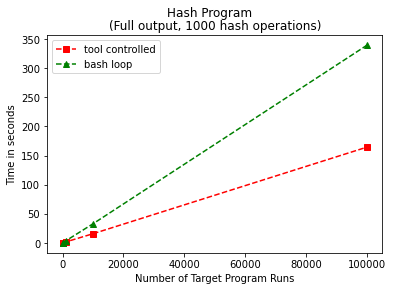

In [13]:
iterations = [10, 100, 1000, 10000, 100000]
tool_time = [0.124, 0.220, 1.624, 15.789, 164.35]
notool_time = [0.050, 0.340, 3.393, 32.828, 339.20]
plt.plot(iterations, tool_time, 'r--s', label="tool controlled")
plt.plot(iterations, notool_time, 'g--^', label="bash loop")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Target Program Runs')
plt.title('(Full output, 1000 hash operations)')
plt.suptitle('Hash Program')
plt.legend()
plt.show()

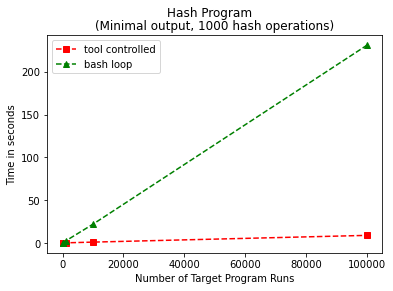

In [73]:
iterations = [10, 100, 1000, 10000, 100000]
tool_time = [0.051, 0.078, 0.153, 0.980, 8.861]
notool_time = [0.260, 0.249, 2.291, 21.919, 230.98]
plt.plot(iterations, tool_time, 'r--s', label="tool controlled")
plt.plot(iterations, notool_time, 'g--^',label="bash loop")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Target Program Runs')
plt.suptitle('Hash Program')
plt.title('(Minimal output, 1000 hash operations)')
plt.legend()
plt.show()

### Random Exit

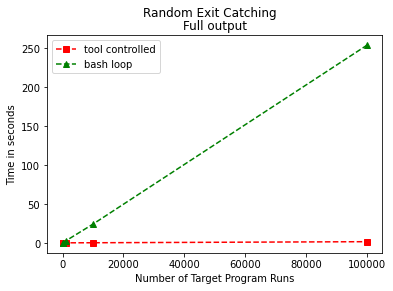

In [72]:
iterations = [10, 100, 1000, 10000, 100000]
tool_time = [0.007, 0.142, 0.141, 0.217, 1.581]
notool_time = [0.152, 0.267, 2.476, 24.129, 253.92]
plt.plot(iterations, tool_time, 'r--s', label="tool controlled")
plt.plot(iterations, notool_time, 'g--^', label="bash loop")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Target Program Runs')
plt.suptitle('Random Exit Catching')
plt.title('Full output')
plt.legend()
plt.show()

### Hash Stepping

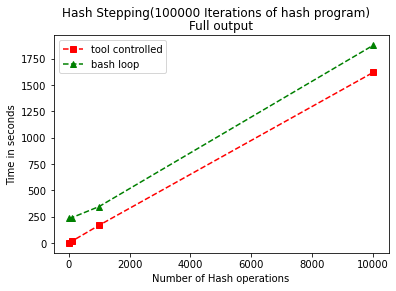

In [68]:
iterations = [10, 100, 1000, 10000]
tool_time = [2.617, 17.812, 169.77, 1620.46]
notool_time = [239, 241.66, 347.41, 1877.59]
plt.plot(iterations, tool_time, 'r--s', label="tool controlled")
plt.plot(iterations, notool_time, 'g--^', label="bash loop")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Hash operations')
plt.suptitle('Hash Stepping(100000 Iterations of hash program)')
plt.title('Full output')
plt.legend()
plt.show()

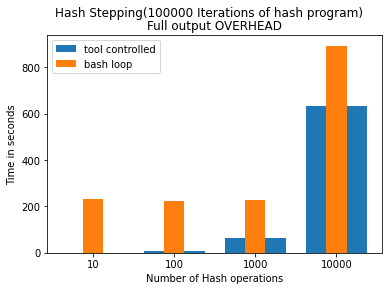

In [14]:
iterations = ['10', '100', '1000', '10000']
tool_time = [1.117, 6.312, 63.97, 632]
notool_time = [233, 225, 227, 892]
plt.bar(iterations, tool_time, label="tool controlled", width=0.75)
plt.bar(iterations, notool_time, label="bash loop", width=0.25)
plt.ylabel('Time in seconds')
plt.xlabel('Number of Hash operations')
plt.suptitle('Hash Stepping(100000 Iterations of hash program)')
plt.title('Full output OVERHEAD')
plt.legend()
plt.show()

### MALLOC

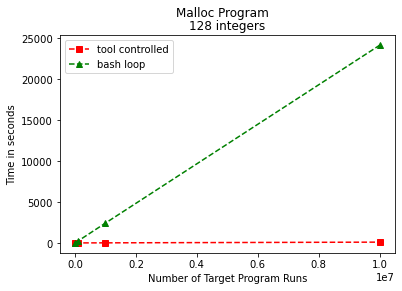

In [75]:
iterations = [10000, 100000, 1000000, 10000000]
tool_time = [0.217, 0.973, 9.081, 95.23]
notool_time = [23.907, 233.32, 2418.62, 24100.789]
plt.plot(iterations, tool_time, 'r--s', label="tool controlled")
plt.plot(iterations, notool_time, 'g--^', label="bash loop")
plt.ylabel('Time in seconds')
plt.xlabel('Number of Target Program Runs')
plt.suptitle('Malloc Program')
plt.title('128 integers')
plt.legend()
plt.show()

### COMMENTS AND THOUGHTS

Malloc program improvement: ~266x improvement
hash program (Minimal output) improvement: ~22x improvement
Hash program (Full Output) improvement: ~2x improvement
random exit program improvement: 111x improvement

- Programs that have malloc/free seem to have much greater speedup
- Programs that have a lot of output will not see as much improvement
- Programs with exits see large improvement with tool
- Programs without mallocs, and with little operations seem to have lower speedup as well


What needs to be tested?
- Windows specialized program testing
- Look into the necessity of a windows proprietary stub
- Test realistic C program with tooling

## ANALYSIS

In [61]:
from decimal import Decimal

file = open("src/results/untooled/results_untooled_testfile.txt", "r")
values = file.readlines()
results_nums_untooled = []
avg = 0
for value in values:
    results_nums_untooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.0000072865


In [62]:
from decimal import Decimal

file = open("src/results/tooled/results_testfile.txt", "r")
values = file.readlines()
results_nums_tooled = []
avg = 0
for value in values:
    results_nums_tooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.0000154477


In [63]:
from decimal import Decimal

file = open("src/results/untooled/results_untooled_practicaltest.txt", "r")
values = file.readlines()
practical_nums_untooled = []
avg = 0
for value in values:
    practical_nums_untooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.0000807545


In [64]:
from decimal import Decimal

file = open("src/results/tooled/results_practical.txt", "r")
values = file.readlines()
avg = 0
practical_nums_tooled = []
for value in values:
    practical_nums_tooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.0000410452


In [22]:
from subprocess import call
from time import perf_counter
t1_start = perf_counter()

call(["./run.sh"])
t1_stop = perf_counter()
 
print("Elapsed time:", t1_stop, t1_start)
 
 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Elapsed time: 13390.345747927 13339.055479443
Elapsed time during the whole program in seconds: 51.29026848399917


In [23]:
t1_start = perf_counter()
call("./src/run.out")
t1_stop = perf_counter()
 
print("Elapsed time:", t1_stop, t1_start)
 
 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Elapsed time: 13452.629417055 13452.155850394
Elapsed time during the whole program in seconds: 0.47356666100131406


In [29]:
practical_nums_untooled

[Decimal('0.000124'),
 Decimal('0.000093'),
 Decimal('0.000094'),
 Decimal('0.000079'),
 Decimal('0.000078'),
 Decimal('0.000077'),
 Decimal('0.000077'),
 Decimal('0.000076'),
 Decimal('0.000077'),
 Decimal('0.000071'),
 Decimal('0.000068'),
 Decimal('0.000069'),
 Decimal('0.000063'),
 Decimal('0.000064'),
 Decimal('0.000064'),
 Decimal('0.000064'),
 Decimal('0.000064'),
 Decimal('0.000065'),
 Decimal('0.000068'),
 Decimal('0.000202'),
 Decimal('0.000086'),
 Decimal('0.000069'),
 Decimal('0.000063'),
 Decimal('0.000063'),
 Decimal('0.000064'),
 Decimal('0.000065'),
 Decimal('0.000064'),
 Decimal('0.000065'),
 Decimal('0.000090'),
 Decimal('0.000123'),
 Decimal('0.000064'),
 Decimal('0.000066'),
 Decimal('0.000064'),
 Decimal('0.000063'),
 Decimal('0.000064'),
 Decimal('0.000067'),
 Decimal('0.000065'),
 Decimal('0.000065'),
 Decimal('0.000081'),
 Decimal('0.000069'),
 Decimal('0.000065'),
 Decimal('0.000066'),
 Decimal('0.000066'),
 Decimal('0.000064'),
 Decimal('0.000065'),
 Decimal('

## PRACTICAL TEST (PRINT FILE DIRECTORY)

In [48]:
import pandas as pd

d = {'untooled':practical_nums_untooled, 'tooled':practical_nums_tooled}
df = pd.DataFrame(d)

Text(0.5, 1.0, 'Print Working Directory')

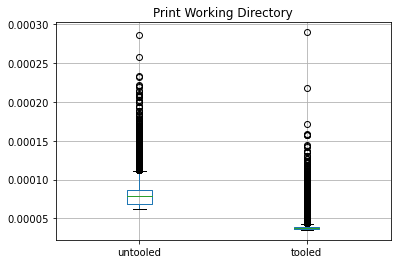

In [58]:
plt.figure()
df.boxplot()
plt.title("Print Working Directory")

## TESTFILE 

In [50]:
import pandas as pd

d2 = {'untooled':results_nums_untooled, 'tooled':results_nums_tooled}
df2 = pd.DataFrame(d2)

Text(0.5, 1.0, 'Malloc')

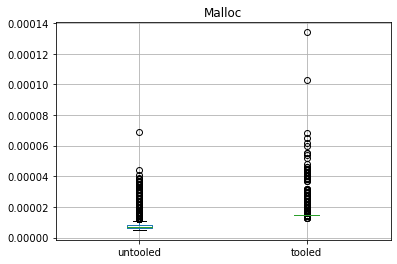

In [57]:

df2.boxplot()
plt.title("Malloc")

## HASH 10 OPERATIONS

In [65]:
file = open("src/results/tooled/results_hash10.txt", "r")
values = file.readlines()
avg = 0
hash_tooled = []
for value in values:
    hash_tooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.0000063878


In [66]:
file = open("src/results/untooled/hash_untooled10.txt", "r")
values = file.readlines()
avg = 0
hash_untooled = []
for value in values:
    hash_untooled.append(float(value))
    avg = avg + Decimal(value)

print(avg/10000)

0.000029445


Text(0.5, 1.0, 'Hash (10 iterations)')

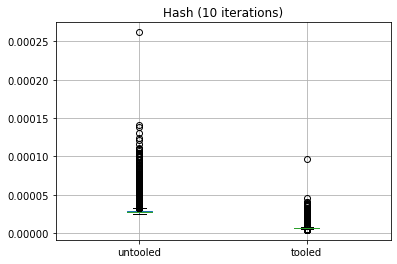

In [67]:
d3 = {'untooled':hash_untooled, 'tooled':hash_tooled}
df3 = pd.DataFrame(d3)
df3.boxplot()
plt.title("Hash (10 iterations)")

## HASH 100 OPERATIONS

Text(0.5, 1.0, 'Hash (100 iterations)')

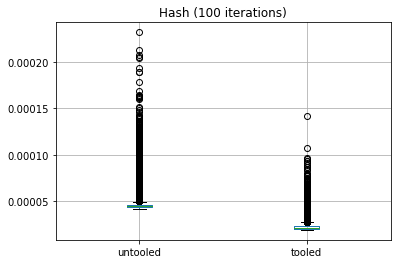

In [68]:
file = open("src/results/tooled/results_hash100.txt", "r")
values = file.readlines()
avg = 0
hash_tooled = []
for value in values:
    hash_tooled.append(float(value))
    avg = avg + Decimal(value)

file = open("src/results/untooled/hash_untooled100.txt", "r")
values = file.readlines()
avg = 0
hash_untooled = []
for value in values:
    hash_untooled.append(float(value))
    avg = avg + Decimal(value)

d3 = {'untooled':hash_untooled, 'tooled':hash_tooled}
df3 = pd.DataFrame(d3)
df3.boxplot()
plt.title("Hash (100 iterations)")

## HASH 1000 Operations

Text(0.5, 1.0, 'Hash (1000 iterations)')

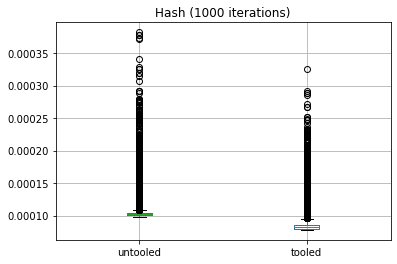

In [69]:
file = open("src/results/tooled/results_hash1000.txt", "r")
values = file.readlines()
avg = 0
hash_tooled = []
for value in values:
    hash_tooled.append(float(value))
    avg = avg + Decimal(value)

file = open("src/results/untooled/hash_untooled1000.txt", "r")
values = file.readlines()
avg = 0
hash_untooled = []
for value in values:
    hash_untooled.append(float(value))
    avg = avg + Decimal(value)

d3 = {'untooled':hash_untooled, 'tooled':hash_tooled}
df3 = pd.DataFrame(d3)
df3.boxplot()
plt.title("Hash (1000 iterations)")